<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.



**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.



**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [3]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import math
import pandas.tseries.offsets as ofs
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools
from collections import Counter

import warnings as w
import plotly.plotly as py
from IPython.display import Image
%matplotlib inline

/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
train = pd.read_csv('train.csv', index_col=1)
train.head()

ID  tsID    ACTUAL  Temp  Saturday  Sunday
Date                                                  
01.01.2010   1     4  35489.95  -0.9       0.0       1
02.01.2010   2     4  35413.59  -0.1       1.0       0
03.01.2010   3     4  34802.67  -3.9       0.0       1
04.01.2010   4     4  36003.84 -13.7       0.0       1
05.01.2010   5     4  37622.96 -16.9       0.0       1

In [5]:
ts = [[],]
for i in np.arange(1, 23):
    ts.append(train[train.tsID == i])

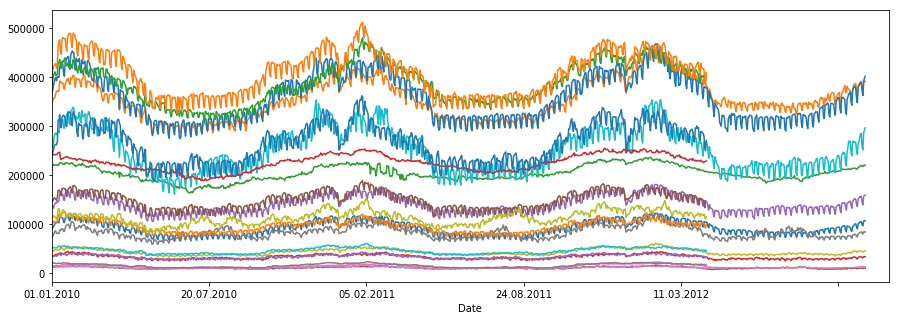

In [14]:
for i in np.arange(1, 23):
    ts[i]['ACTUAL'].plot(figsize=(15,5))

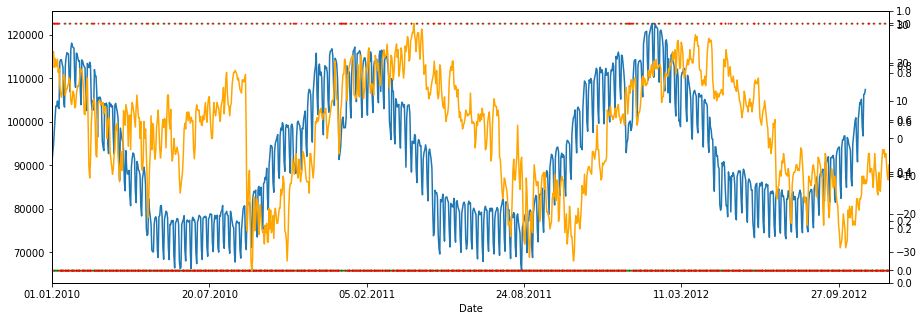

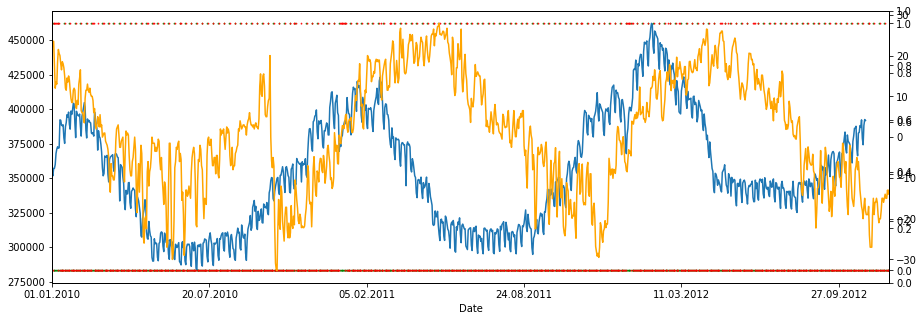

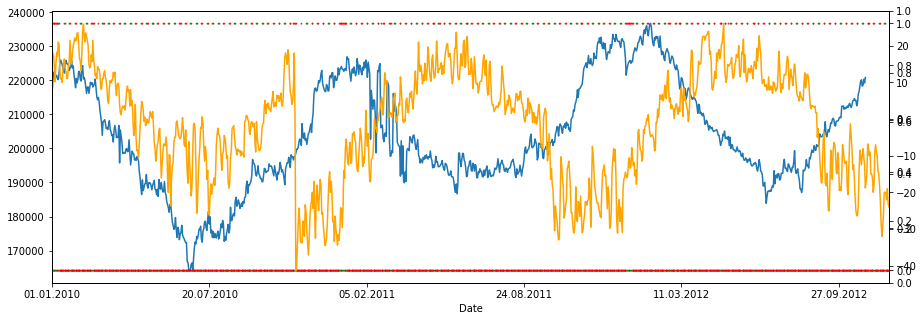

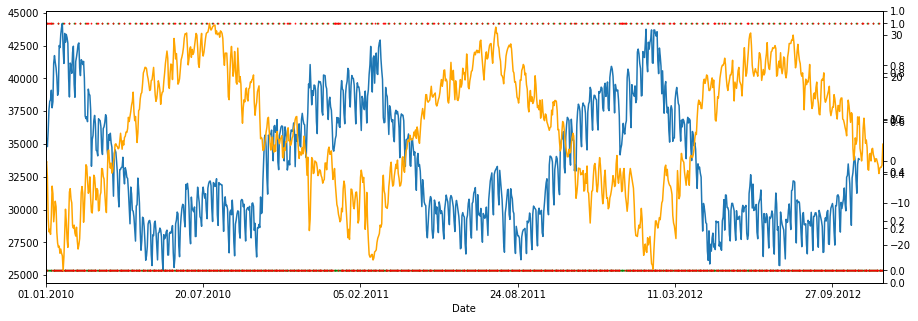

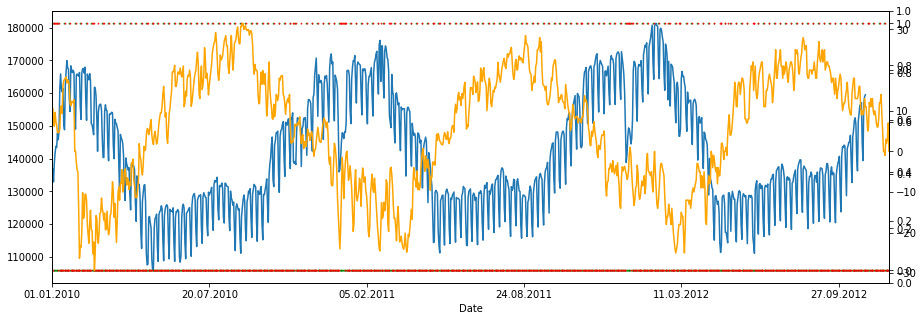

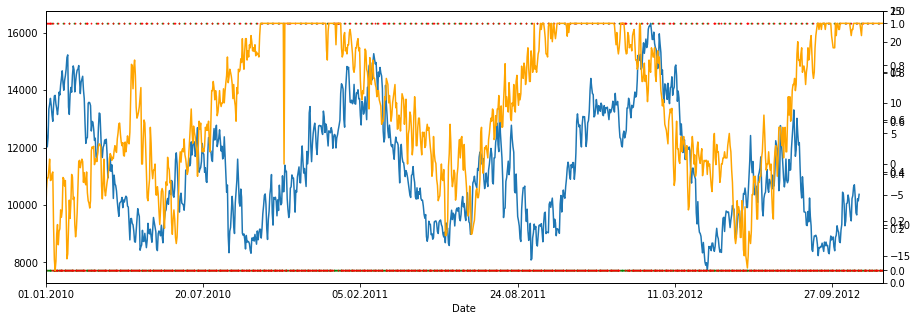

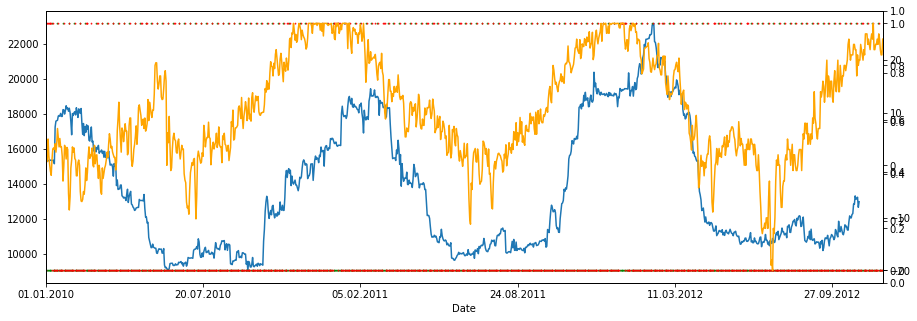

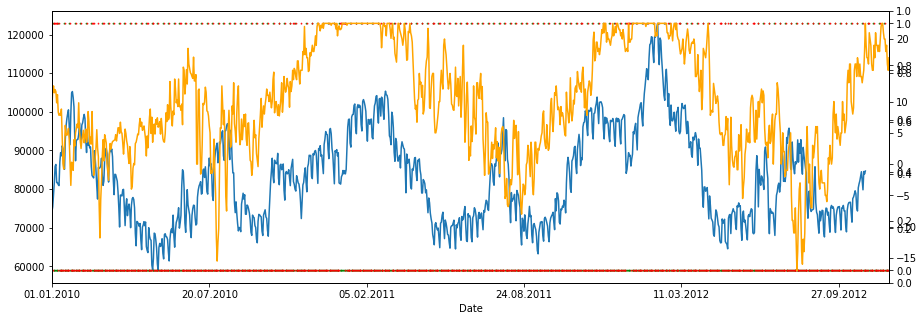

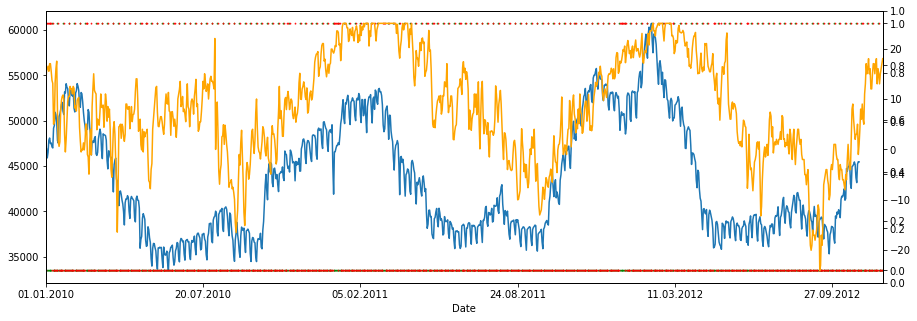

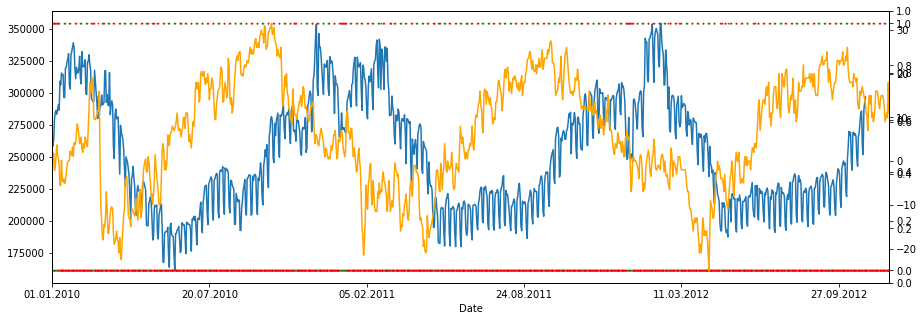

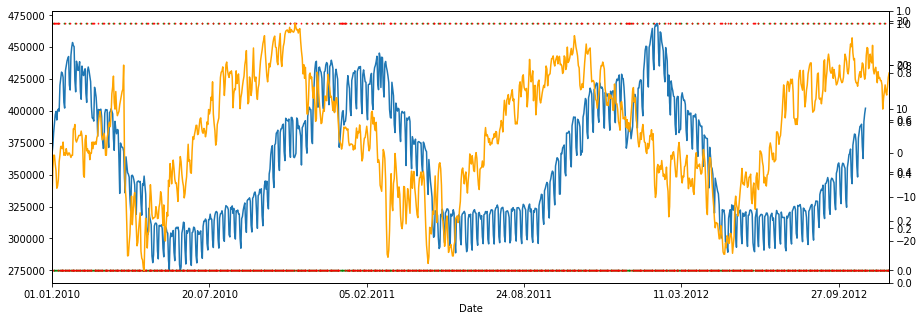

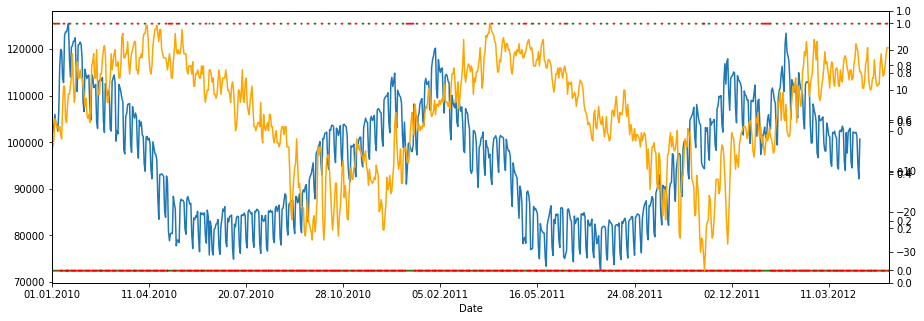

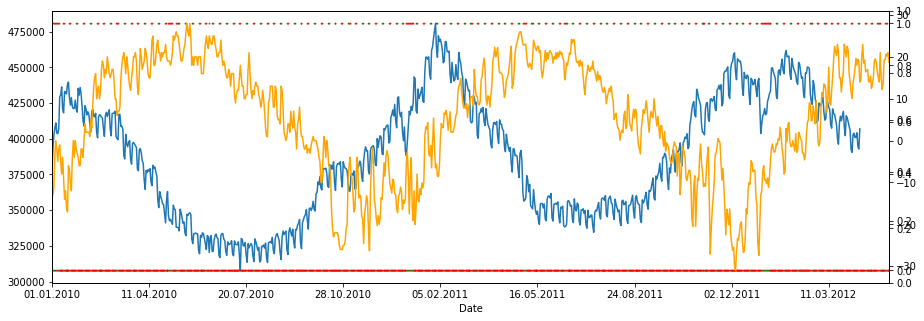

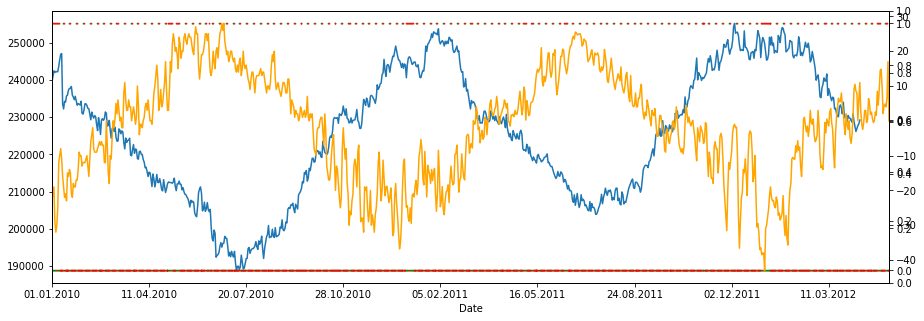

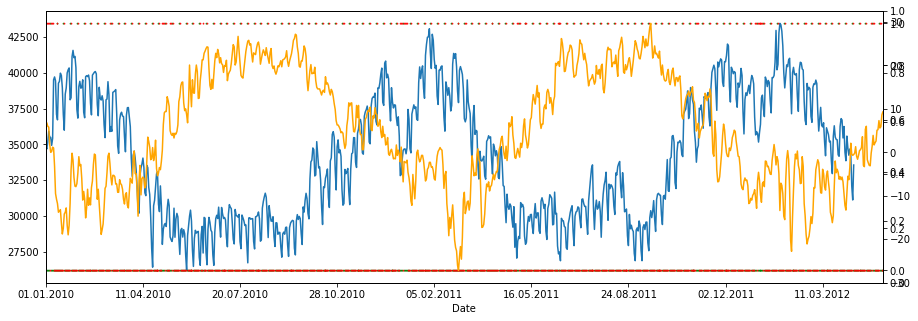

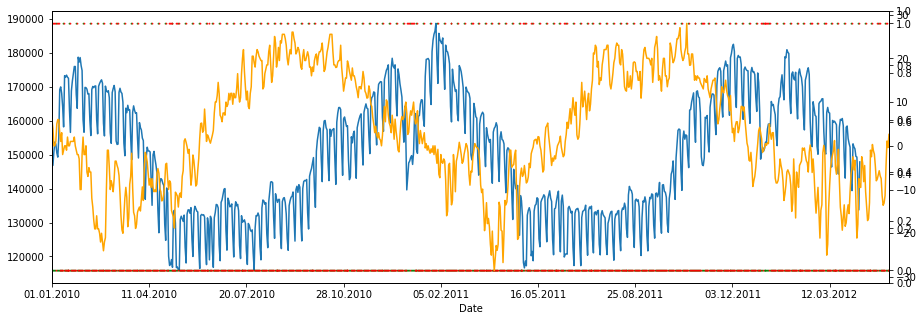

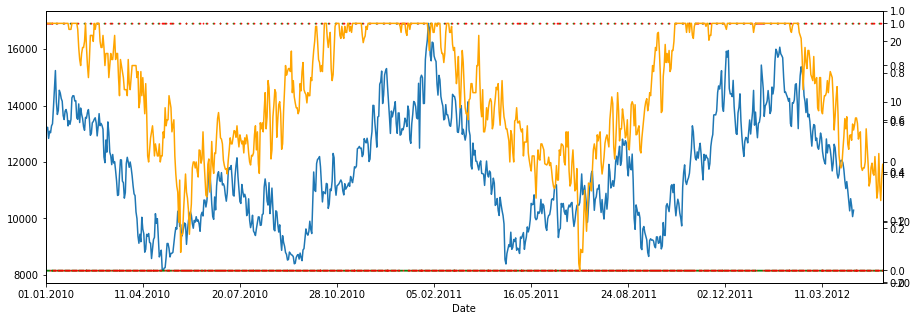

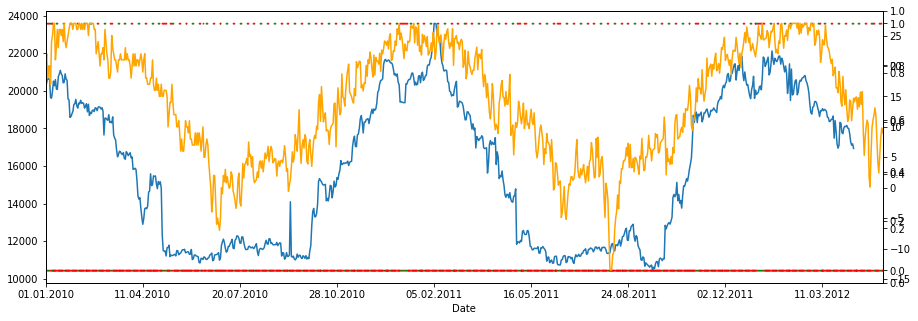

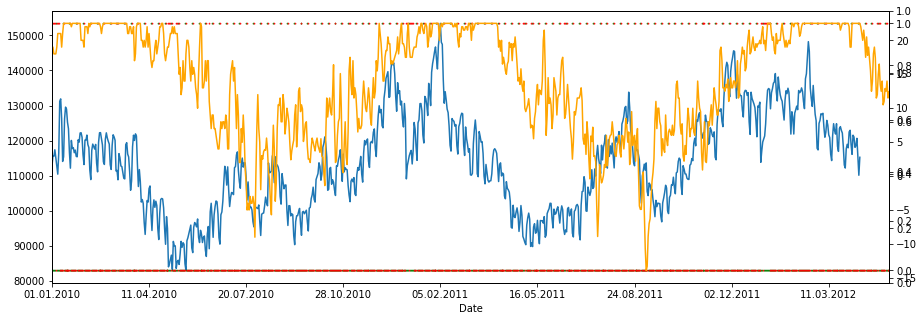

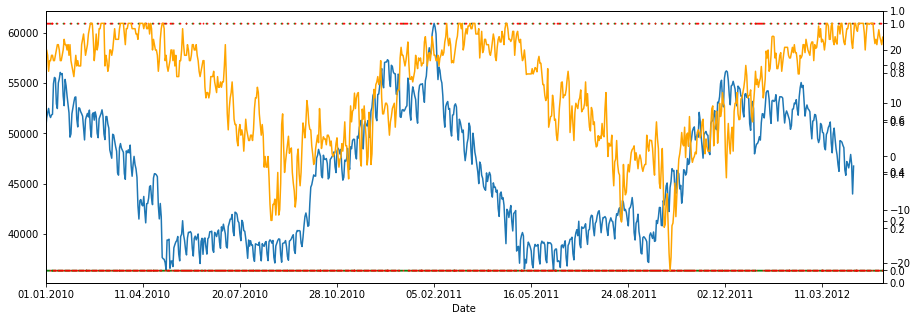

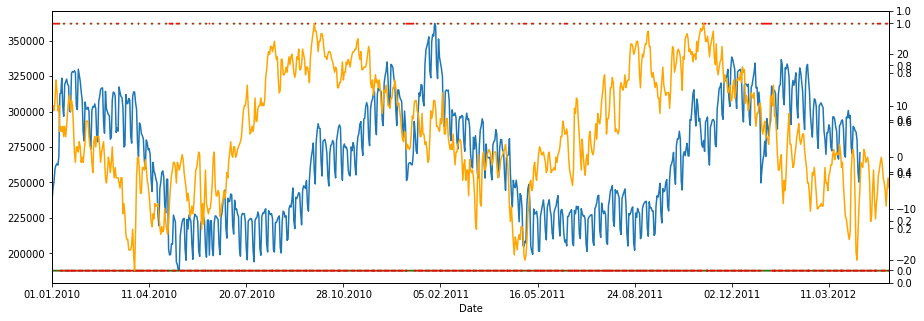

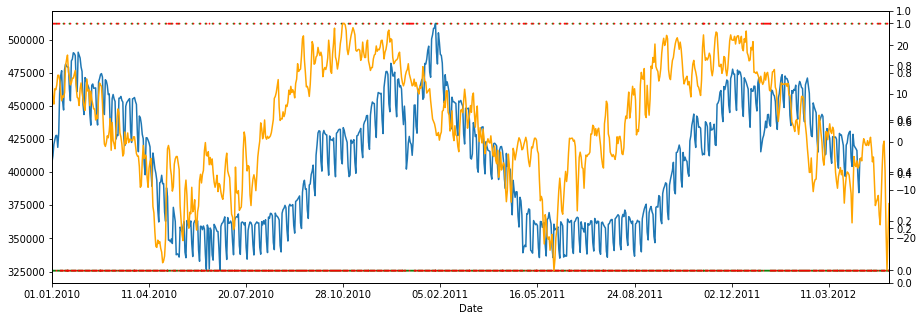

In [23]:
for i in np.arange(1, 23):
    fig, ax = plt.subplots(figsize=(15,5))
    ax2, ax3, ax4 = ax.twinx(), ax.twinx(), ax.twinx()
    ts[i]['ACTUAL'].plot(ax=ax, figsize=(15,5))
    ts[i]['Saturday'].plot(ax=ax2, style='g', marker = '^', markersize=1, linewidth=0.0)
    ts[i]['Sunday'].plot(ax=ax2, style='r', marker = '^', markersize=1, linewidth=0.0)
    ts[i]['Temp'].plot(ax=ax3, color='orange' )
    plt.show()

In [477]:
ts_train = [[]]
ts_test = [[]]
ts[11]['Saturday'] = ts[11]['Saturday'].fillna(0.)
for i in ts[1:]:
    ts_train.append(i.dropna())
    ts_test.append(i.drop(ts_train[-1].index))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



series 1


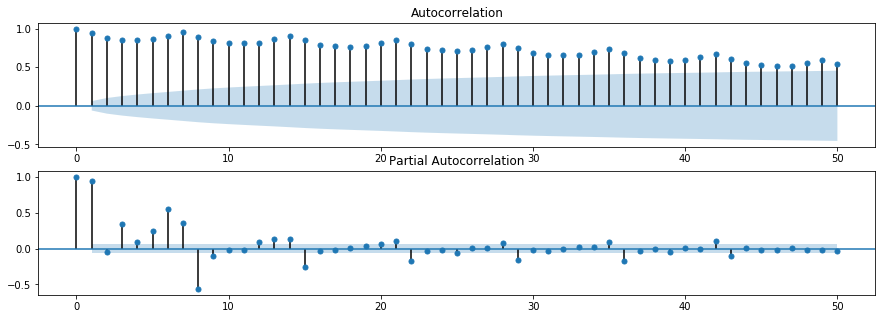

series 2


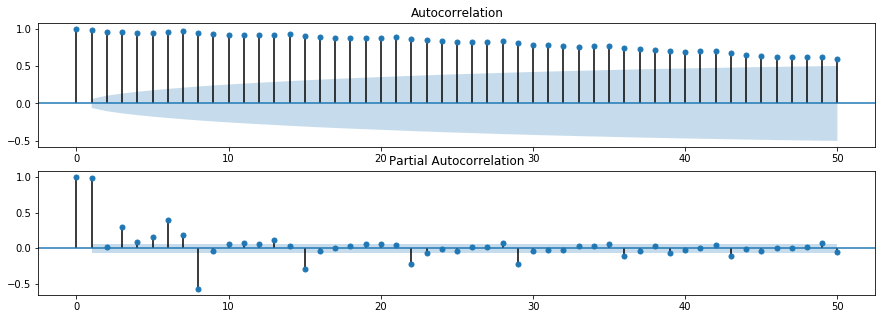

series 3


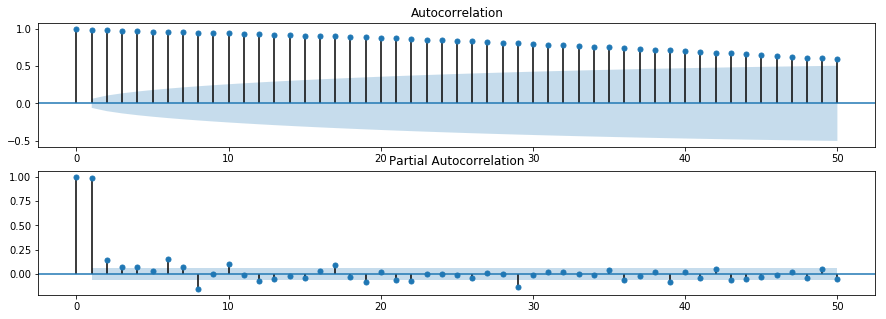

series 4


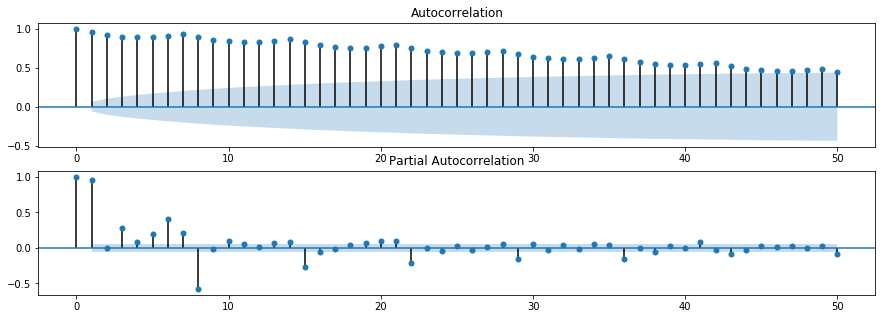

series 5


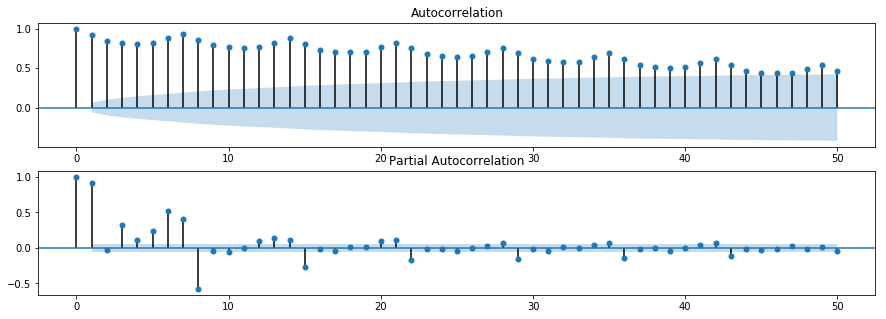

series 6


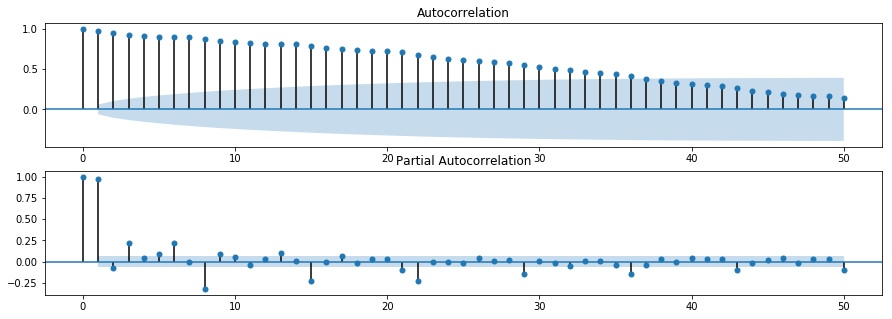

series 7


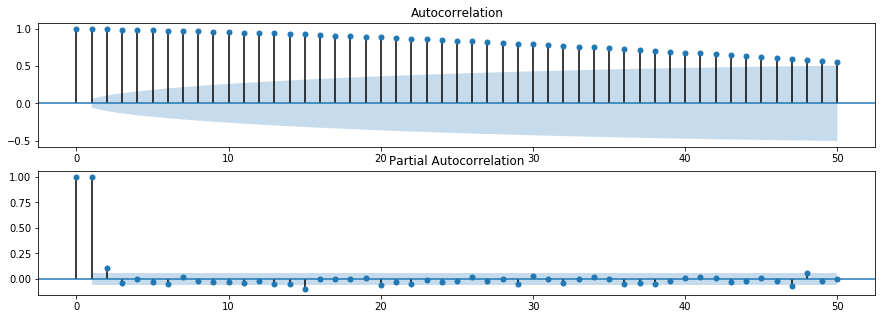

series 8


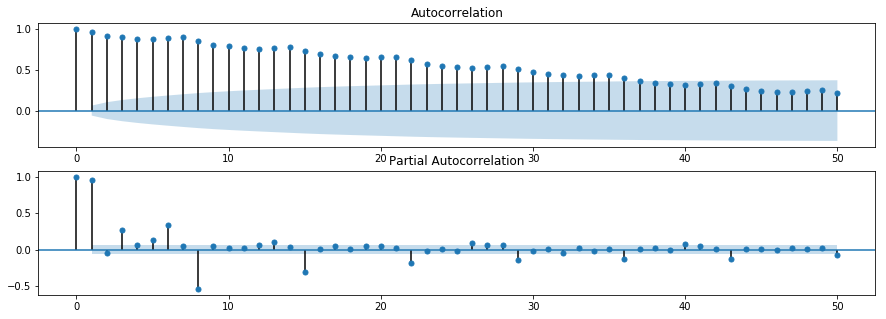

series 9


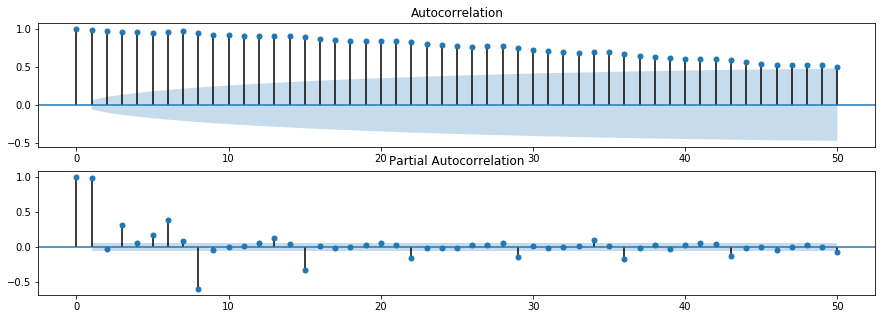

series 10


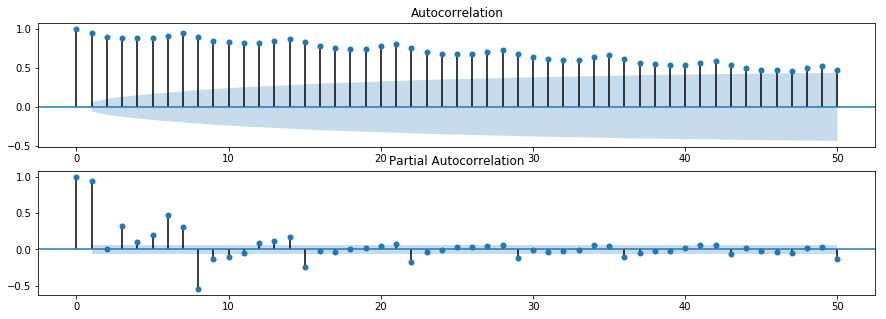

series 11


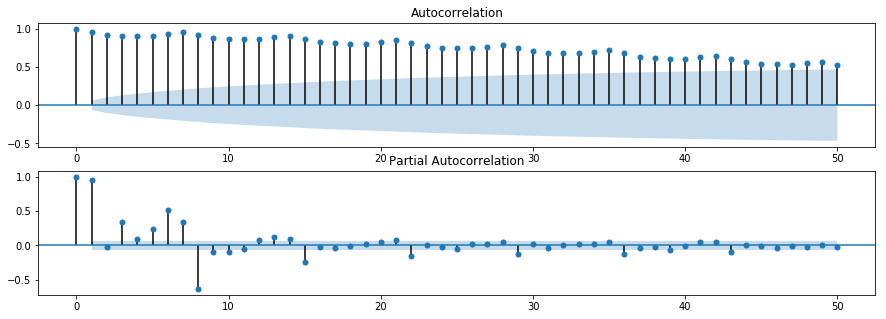

series 12


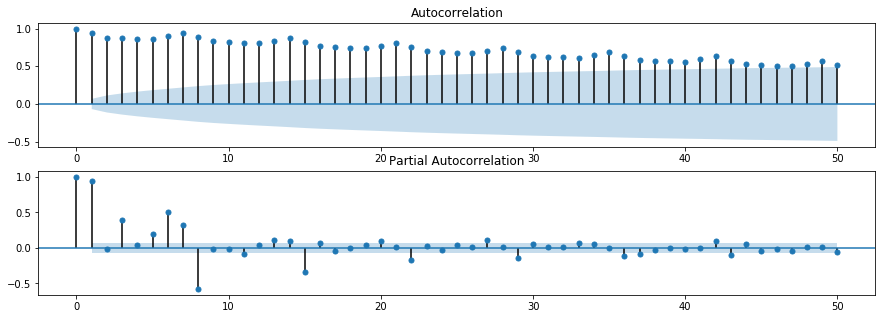

series 13


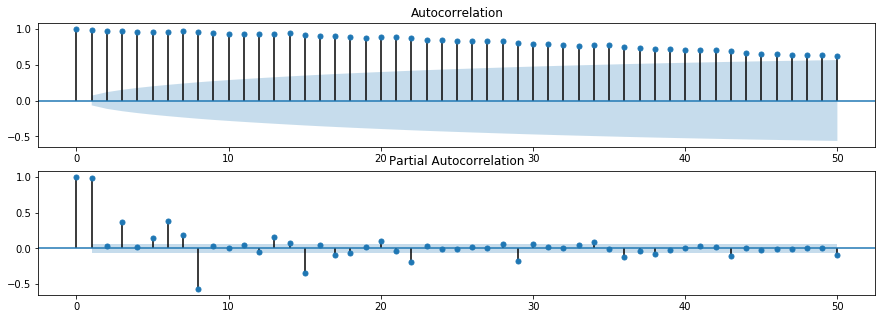

series 14


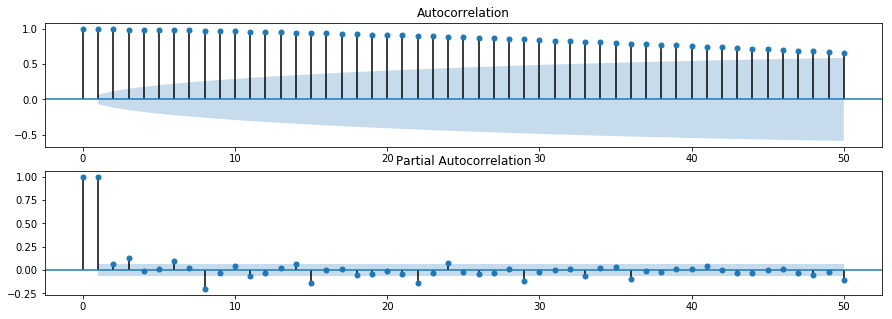

series 15


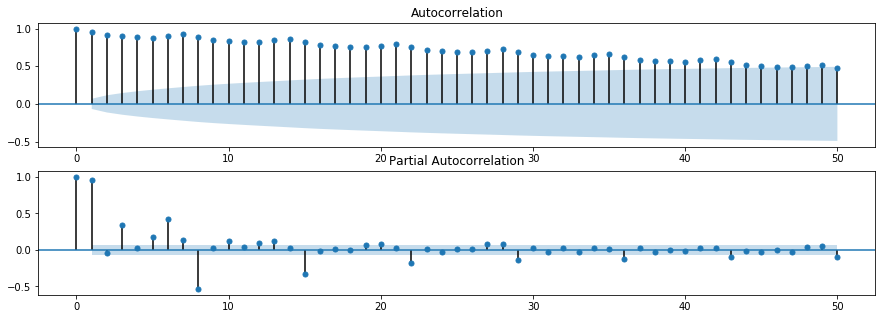

series 16


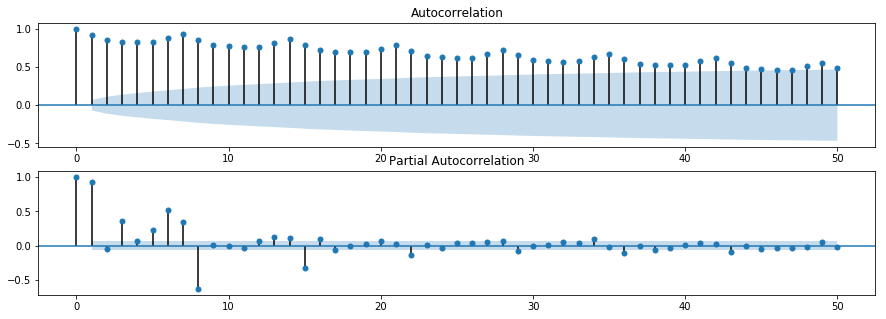

series 17


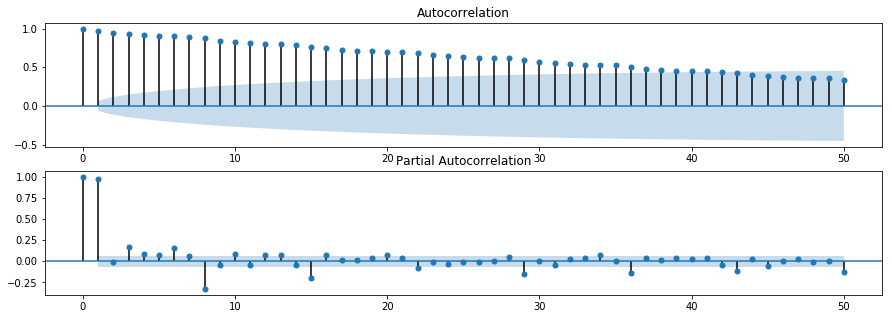

series 18


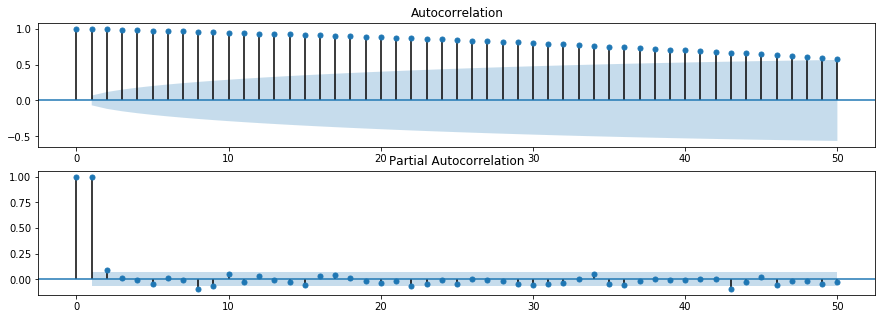

series 19


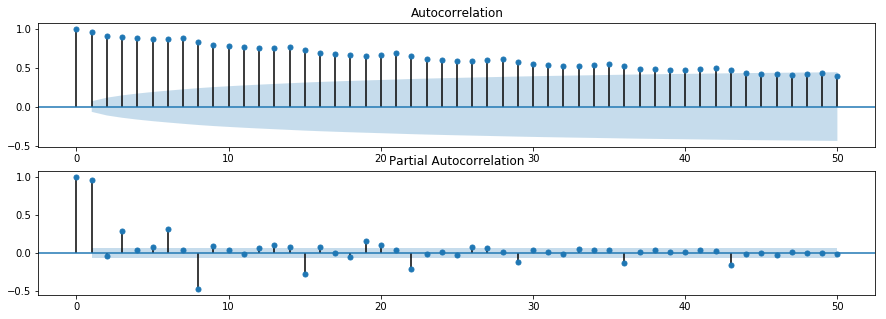

series 20


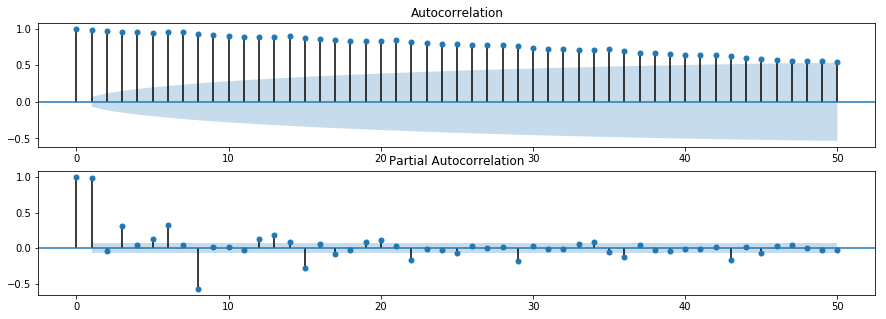

series 21


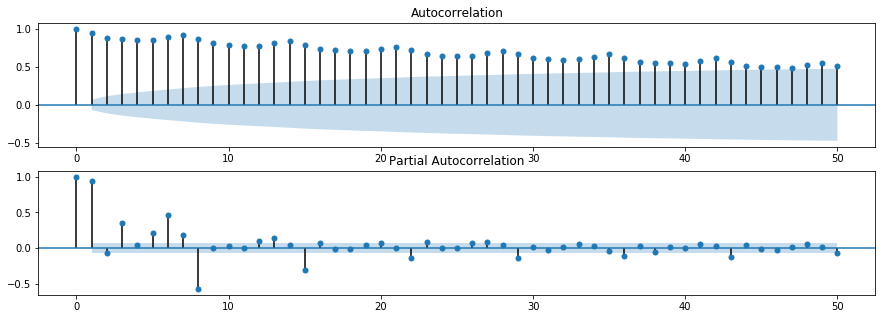

series 22


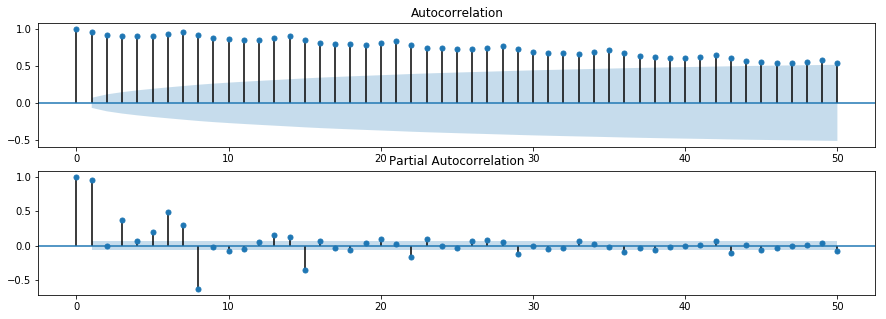

In [366]:
for i in np.arange(1, 23):
    print('series '+str(i))
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts_train[i]['ACTUAL'].values.squeeze(), lags=50, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts_train[i]['ACTUAL'].values.squeeze(), lags=50, ax=ax2)
    plt.show()

In [327]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
trrr = ts_train[2][['ACTUAL', 'Temp', 'Saturday', 'Sunday']]

In [328]:
trrr['id'] = range(len(trrr))
for i in np.arange(5):
    trrr['cos'+str(2*i+1)] = np.cos(trrr['id']*(2*i+1)*np.pi*2/365.2424)
mod = LinearRegression()
mod.fit(trrr.drop('ACTUAL', axis=1), trrr['ACTUAL'])
trrr['result'] = mod.predict(trrr.drop('ACTUAL', axis=1))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

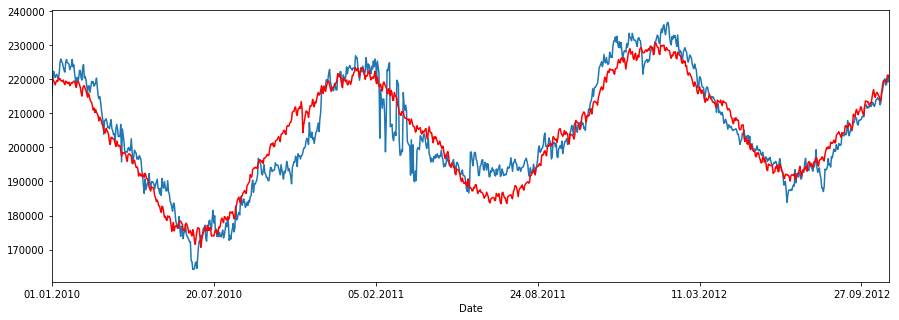

In [329]:
fig, ax = plt.subplots(figsize=(15,5))
trrr['ACTUAL'].plot(ax=ax, figsize=(15,5))
trrr['result'].plot(color='red')
plt.show()

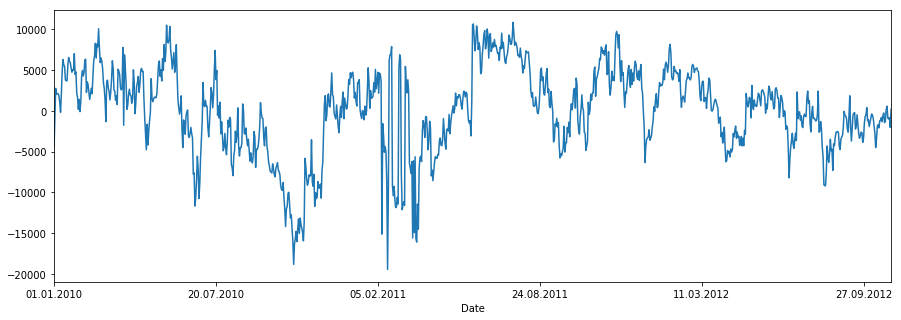

In [330]:
newts = (trrr['ACTUAL']-trrr['result'])
newts.plot(figsize=(15,5))

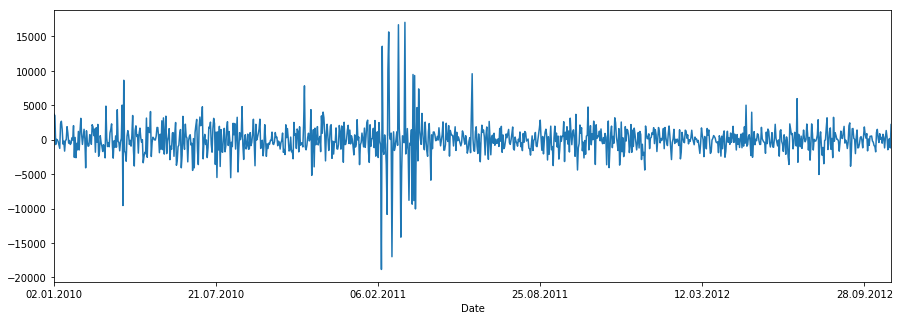

In [331]:
newts_dif = pd.DataFrame(newts[1:])
newts_dif['ACTUAL'] = (newts[1:].values - newts[:-1].values)
newts_dif['ACTUAL'].plot(figsize=(15,5))

In [332]:
kpss_stat= stattools.kpss(np.array(newts_dif['ACTUAL']))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.024258, 
pvalue: 0.10 
maximal Lag: 22 
table distribution: {'5%': 0.463, '1%': 0.739, '2.5%': 0.574, '10%': 0.347}


In [321]:
arima_mod010 = sm.tsa.ARIMA(newts, (7,1,0)).fit()
print(arima_mod010.params)
print(arima_mod010.aic, arima_mod010.bic, arima_mod010.hqic)

const        2.457266
ar.L1.D.y   -0.222515
ar.L2.D.y   -0.154486
ar.L3.D.y   -0.156732
ar.L4.D.y   -0.108889
ar.L5.D.y   -0.216742
ar.L6.D.y   -0.095665
ar.L7.D.y    0.107504
dtype: float64
(19004.78074030512, 19049.251450800733, 19021.655258580005)


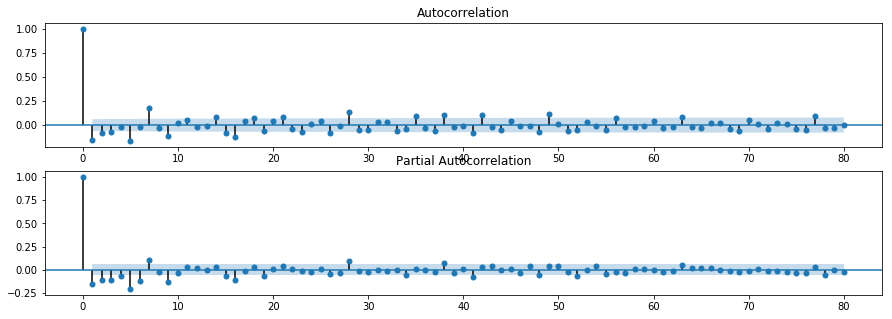

In [322]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(newts_dif['ACTUAL'], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(newts_dif['ACTUAL'], lags=80, ax=ax2)

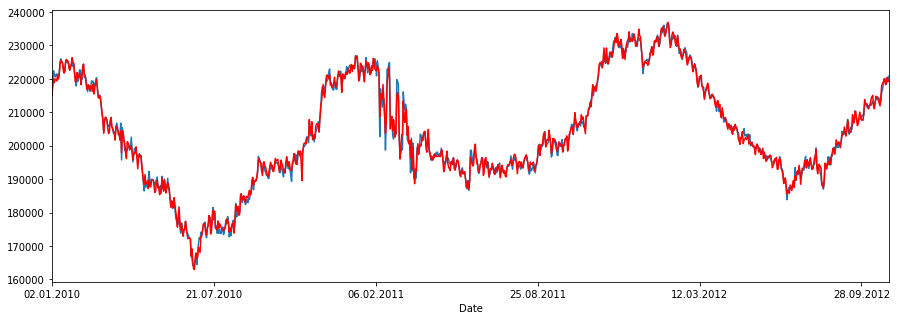

In [342]:
res = arima_mod010.predict(typ='levels')
res.index=trrr.index[1:]
res += trrr['result']
#fig= plt.figure(figsize=(15,5))
trrr['ACTUAL'].plot(figsize=(15,5))
res.plot(figsize=(15,5), color='red')
plt.show()

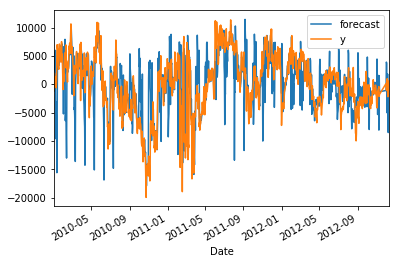

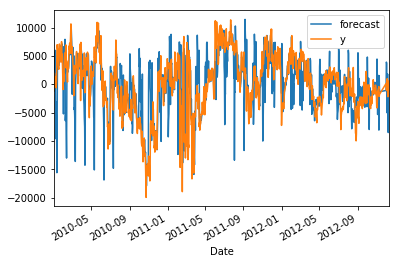

In [324]:
arima_mod010.plot_predict()

Линейная регрессия (с добавлением косинусов) + arima от остатка

In [504]:

def pred(train_ts, test_ts, ts):
    train = train_ts[['ACTUAL', 'Temp', 'Saturday', 'Sunday']]
    train['id'] = range(len(train))
    for i in np.arange(5):
        train['cos'+str(2*i+1)] = np.cos(train['id']*(2*i+1)*np.pi*2/365.2424)
    mod = LinearRegression()
    mod.fit(train.drop('ACTUAL', axis=1), train['ACTUAL'])
    train['result'] = mod.predict(train.drop('ACTUAL', axis=1))
    
    test = test_ts[['ACTUAL', 'Temp', 'Saturday', 'Sunday']]
    test['id'] = np.arange(len(train), len(train)+len(test))
    for i in np.arange(5):
        test['cos'+str(2*i+1)] = np.cos(test['id']*(2*i+1)*np.pi*2/365.2424)
    
    test['ACTUAL'] = mod.predict(test.drop('ACTUAL', axis=1))
    
    newts = (train['ACTUAL']-train['result'])
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(newts_dif['ACTUAL'], lags=80, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(newts_dif['ACTUAL'], lags=80, ax=ax2)
    plt.show()
    
    arima_mod = sm.tsa.ARIMA(newts, (7,1,0)).fit()
    print(arima_mod.params)
    print(arima_mod.aic, arima_mod.bic, arima_mod.hqic)
    
    res = arima_mod.predict(typ='levels')
    res.index=train.index[1:]
    res += train['result']
    
    test['ACTUAL'] = test['ACTUAL'] + arima_mod.forecast(steps=len(test))[0]
    test_ts['ACTUAL'] = test['ACTUAL']
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax2, ax3 = ax.twinx(), ax.twinx()
    ts['Temp'].plot(ax=ax3, color='g')
    ts['ACTUAL'].plot(ax=ax,figsize=(15,5), color='b')
    res.append(test['ACTUAL']).plot(ax=ax, color='r')
    plt.show()

1


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

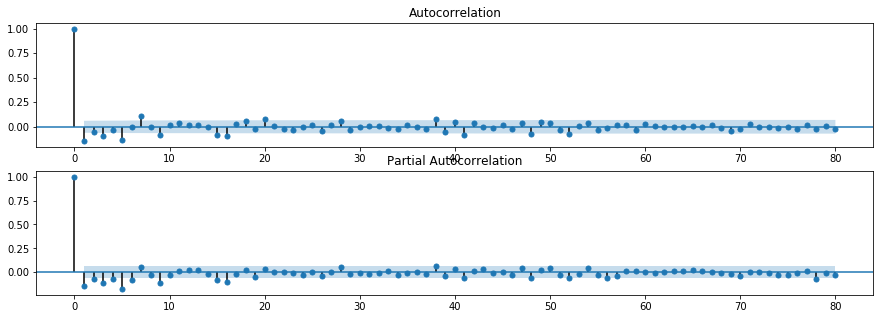

const        16.587980
ar.L1.D.y     0.067602
ar.L2.D.y    -0.160218
ar.L3.D.y    -0.071894
ar.L4.D.y    -0.037926
ar.L5.D.y    -0.036321
ar.L6.D.y    -0.007566
ar.L7.D.y     0.189035
dtype: float64
(18458.54578658006, 18503.016497075674, 18475.420304854946)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



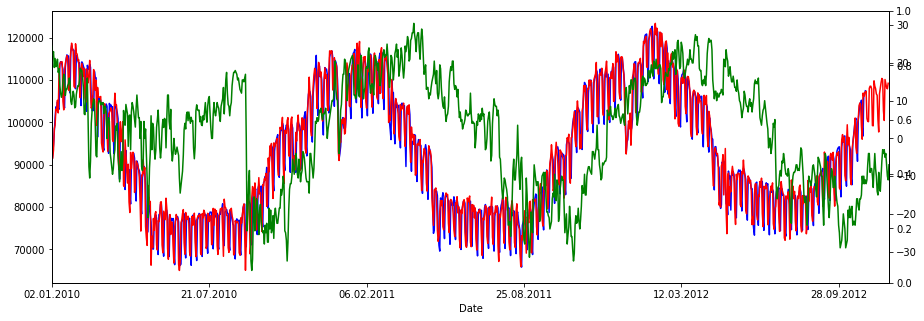

2


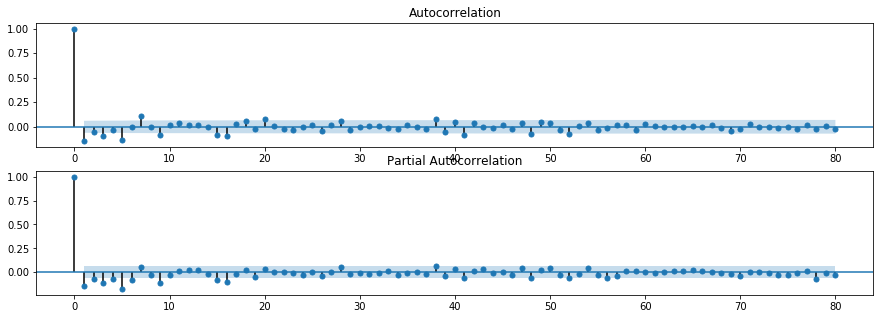

const        13.041006
ar.L1.D.y    -0.050922
ar.L2.D.y    -0.009773
ar.L3.D.y    -0.029467
ar.L4.D.y    -0.037850
ar.L5.D.y    -0.062171
ar.L6.D.y    -0.068903
ar.L7.D.y     0.301816
dtype: float64
(20188.74696155567, 20233.217672051283, 20205.621479830555)


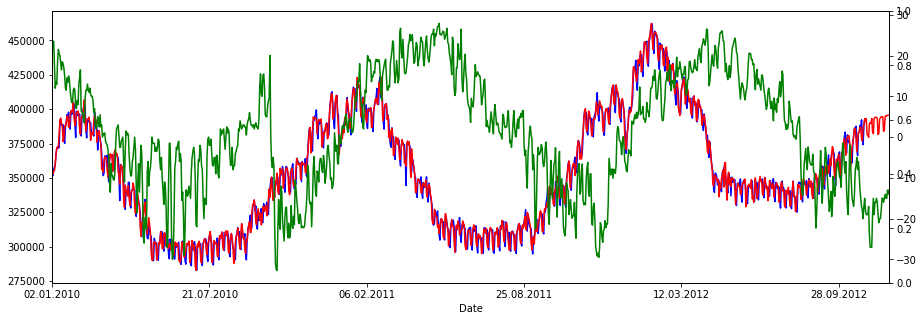

3


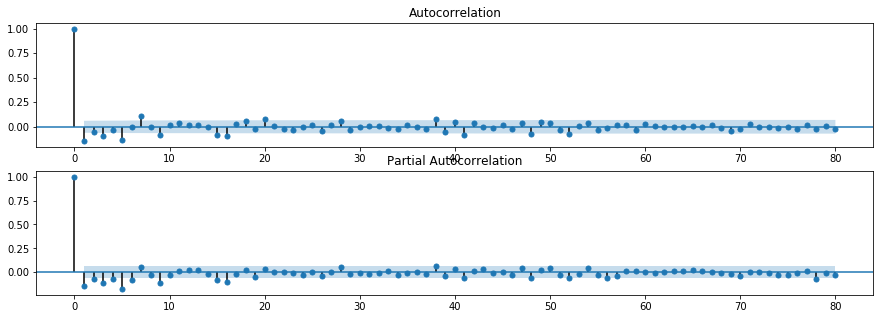

const       -15.078646
ar.L1.D.y    -0.245867
ar.L2.D.y    -0.114550
ar.L3.D.y    -0.111002
ar.L4.D.y    -0.076808
ar.L5.D.y    -0.153001
ar.L6.D.y    -0.131394
ar.L7.D.y     0.235395
dtype: float64
(19187.323364186137, 19231.794074681751, 19204.197882461023)


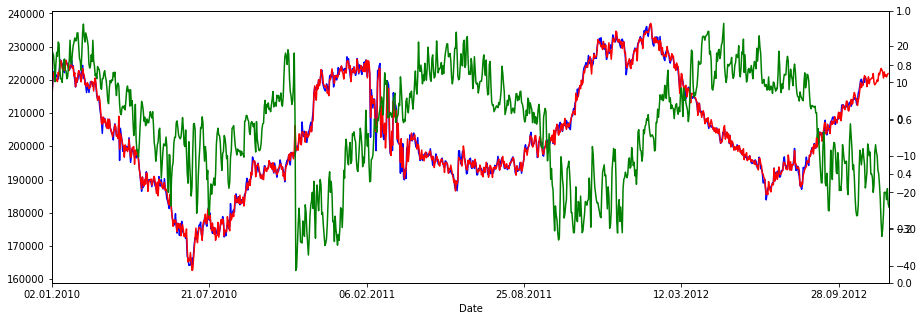

4


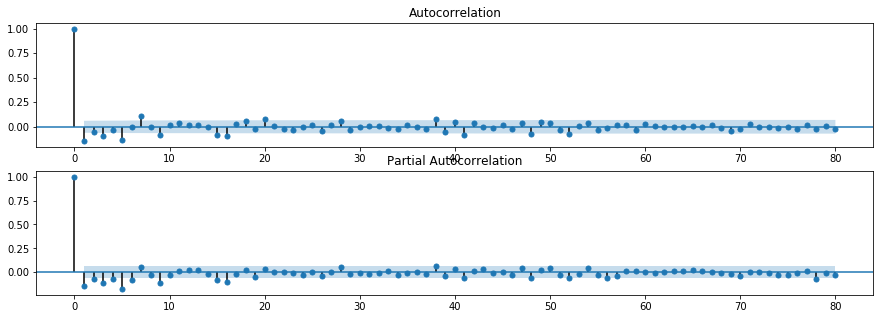

const       -0.247297
ar.L1.D.y    0.029033
ar.L2.D.y   -0.208113
ar.L3.D.y   -0.146429
ar.L4.D.y   -0.084627
ar.L5.D.y   -0.053237
ar.L6.D.y   -0.067361
ar.L7.D.y   -0.050150
dtype: float64
(16943.154520692915, 16987.625231188529, 16960.029038967801)


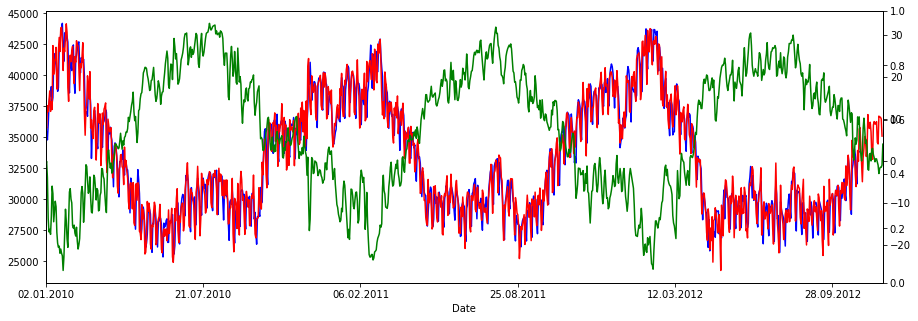

5


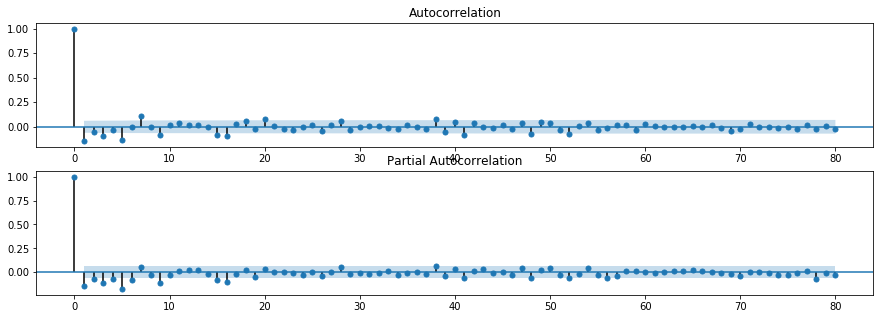

const        3.617555
ar.L1.D.y    0.043635
ar.L2.D.y   -0.136653
ar.L3.D.y   -0.126152
ar.L4.D.y   -0.079219
ar.L5.D.y   -0.048837
ar.L6.D.y   -0.012268
ar.L7.D.y    0.021363
dtype: float64
(19488.424251789285, 19532.8949622849, 19505.298770064172)


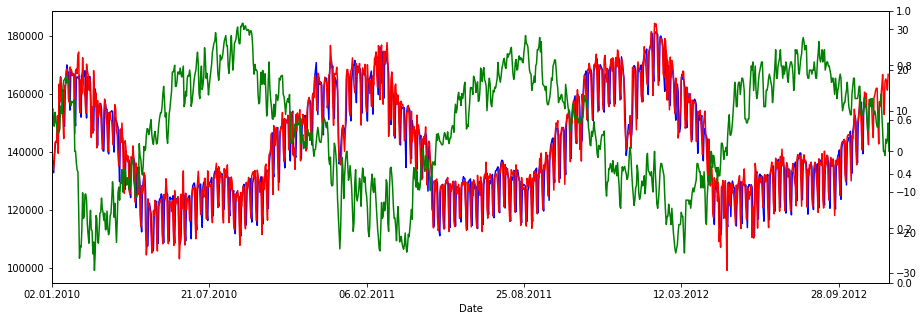

6


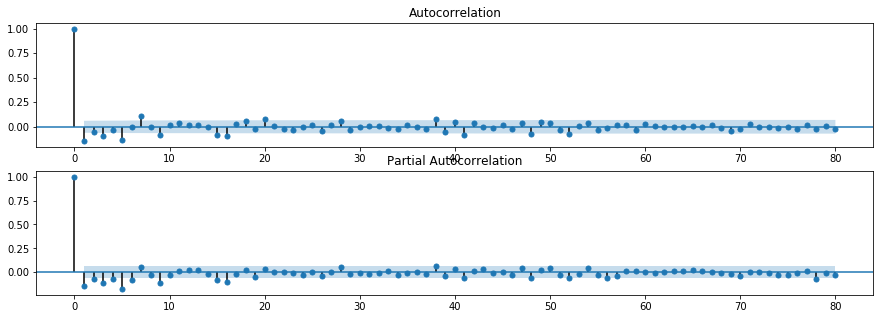

const       -2.926956
ar.L1.D.y    0.094997
ar.L2.D.y   -0.093882
ar.L3.D.y   -0.062988
ar.L4.D.y   -0.043299
ar.L5.D.y   -0.034086
ar.L6.D.y   -0.020722
ar.L7.D.y    0.079508
dtype: float64
(15003.798569806511, 15048.269280302127, 15020.673088081398)


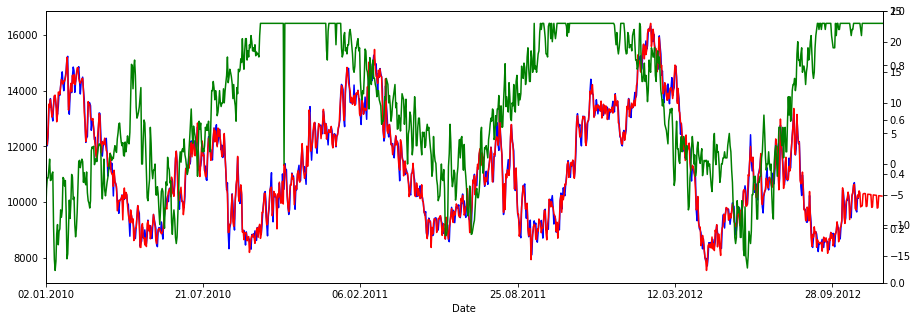

7


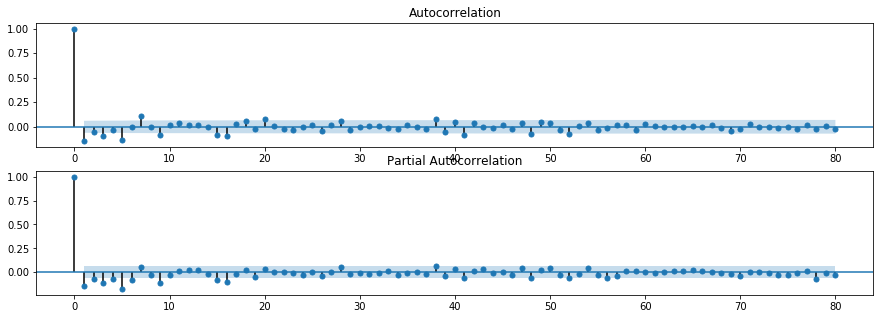

const       -5.351057
ar.L1.D.y   -0.136835
ar.L2.D.y   -0.140305
ar.L3.D.y   -0.129743
ar.L4.D.y   -0.048378
ar.L5.D.y   -0.061764
ar.L6.D.y   -0.088841
ar.L7.D.y    0.025816
dtype: float64
(16153.593696392465, 16198.064406888081, 16170.468214667351)


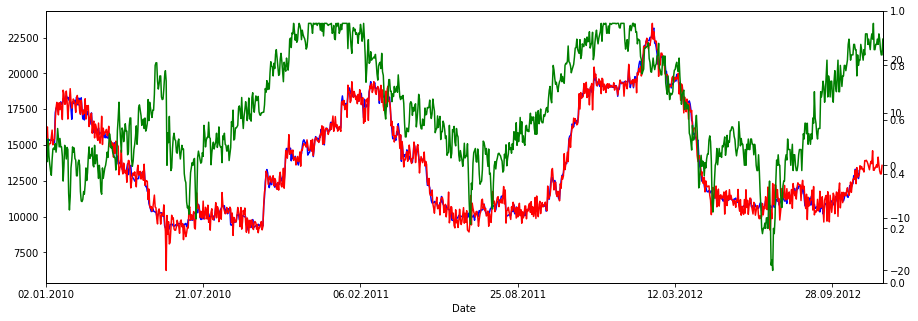

8


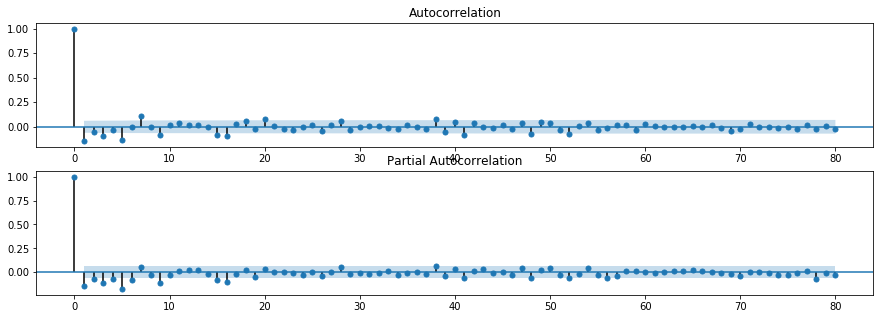

const       -5.447759
ar.L1.D.y    0.081103
ar.L2.D.y   -0.099441
ar.L3.D.y   -0.083637
ar.L4.D.y   -0.040890
ar.L5.D.y   -0.025127
ar.L6.D.y    0.036342
ar.L7.D.y    0.000065
dtype: float64
(19201.367891772556, 19245.83860226817, 19218.242410047442)


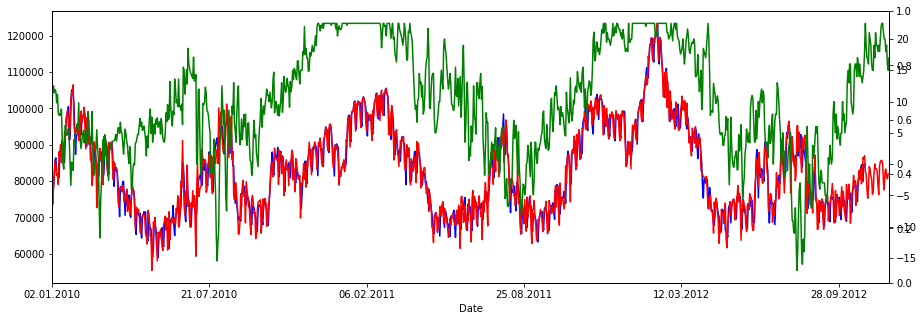

9


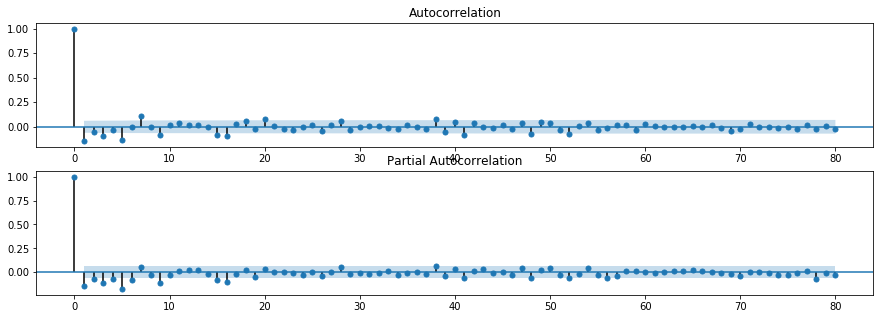

const       -0.082603
ar.L1.D.y    0.005201
ar.L2.D.y   -0.170371
ar.L3.D.y   -0.065001
ar.L4.D.y   -0.116769
ar.L5.D.y   -0.053225
ar.L6.D.y   -0.044682
ar.L7.D.y    0.013616
dtype: float64
(17494.957619793946, 17539.42833028956, 17511.832138068832)


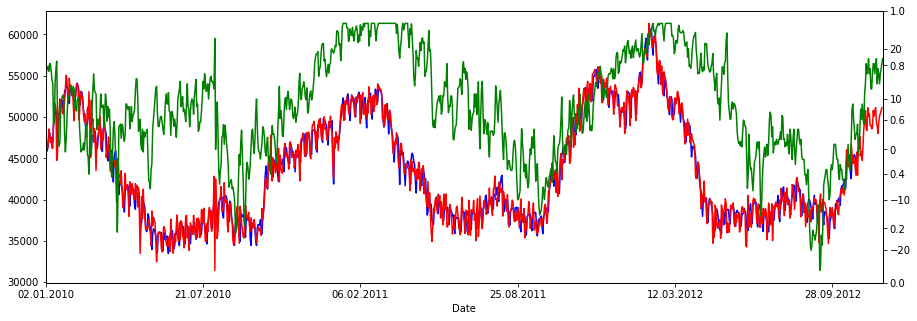

10


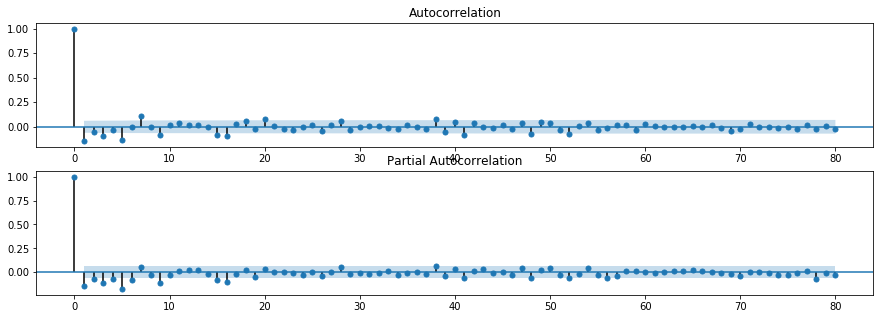

const        39.314511
ar.L1.D.y    -0.129951
ar.L2.D.y    -0.153842
ar.L3.D.y    -0.087371
ar.L4.D.y    -0.017669
ar.L5.D.y     0.004582
ar.L6.D.y     0.021298
ar.L7.D.y     0.187536
dtype: float64
(21060.61747143626, 21105.088181931875, 21077.491989711147)


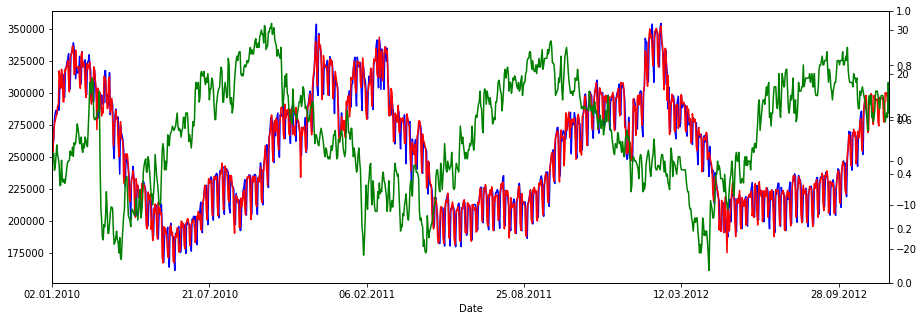

11


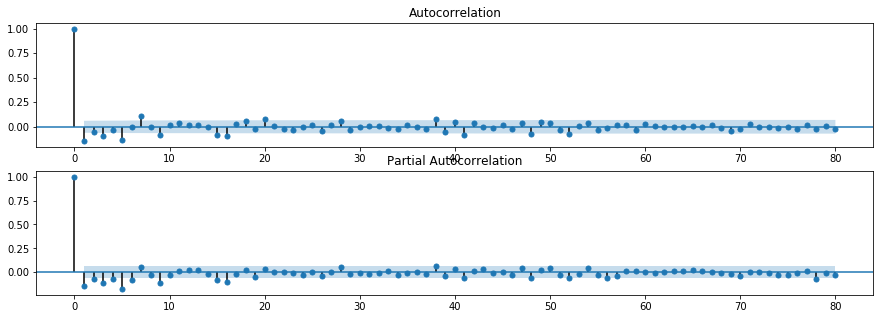

const        39.225552
ar.L1.D.y    -0.059539
ar.L2.D.y    -0.005177
ar.L3.D.y    -0.035306
ar.L4.D.y    -0.065256
ar.L5.D.y     0.012937
ar.L6.D.y    -0.020370
ar.L7.D.y     0.459117
dtype: float64
(20262.63640554454, 20307.107116040155, 20279.510923819427)


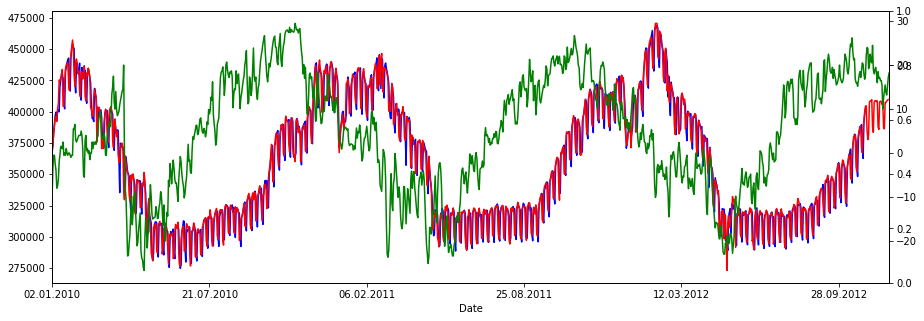

12


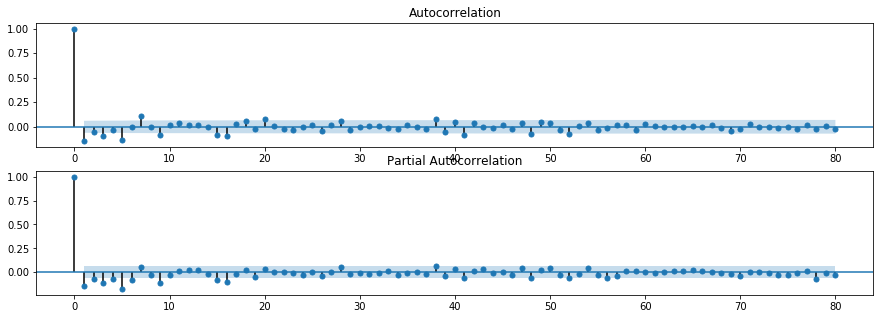

const       -8.959822
ar.L1.D.y    0.008424
ar.L2.D.y   -0.033631
ar.L3.D.y   -0.003628
ar.L4.D.y    0.020849
ar.L5.D.y   -0.063705
ar.L6.D.y   -0.003577
ar.L7.D.y    0.126872
dtype: float64
(14344.334015517023, 14386.848507484414, 14360.635864839034)


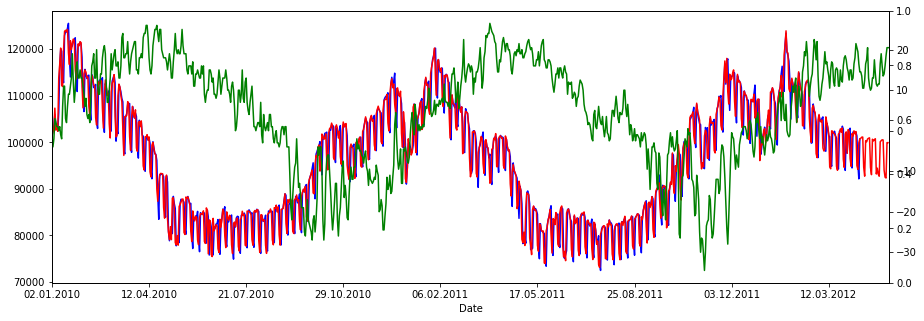

13


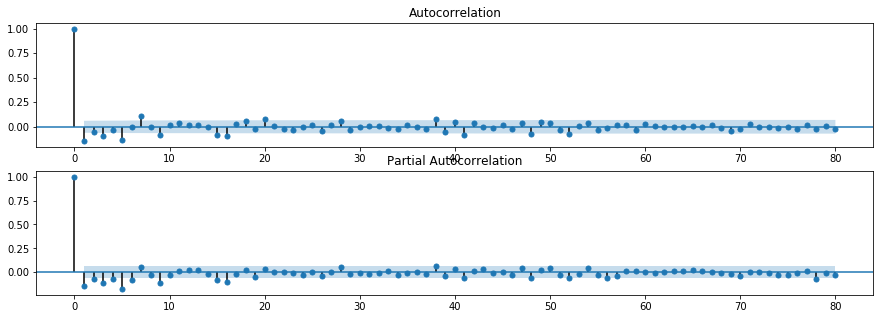

const        1.556679
ar.L1.D.y    0.068533
ar.L2.D.y   -0.167702
ar.L3.D.y    0.002205
ar.L4.D.y   -0.140066
ar.L5.D.y   -0.074138
ar.L6.D.y   -0.086097
ar.L7.D.y    0.048558
dtype: float64
(16672.777977084475, 16715.292469051867, 16689.079826406487)


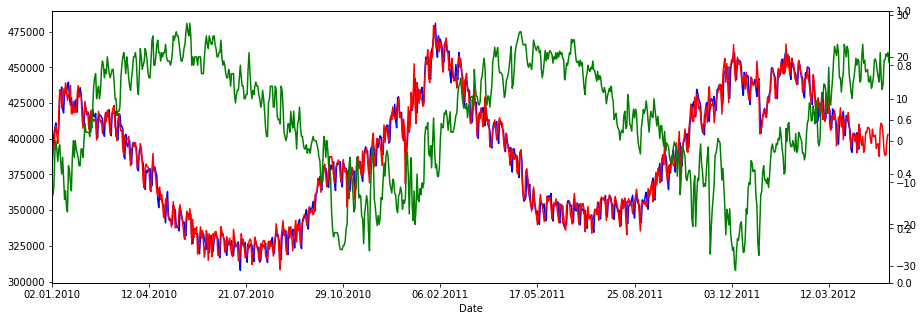

14


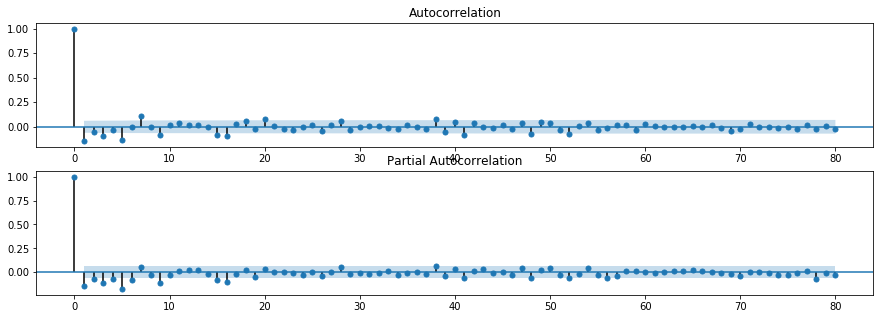

const       -2.557362
ar.L1.D.y    0.041822
ar.L2.D.y   -0.310264
ar.L3.D.y   -0.093210
ar.L4.D.y   -0.167892
ar.L5.D.y   -0.160564
ar.L6.D.y   -0.075988
ar.L7.D.y   -0.101385
dtype: float64
(16008.395439974634, 16050.909931942026, 16024.697289296646)


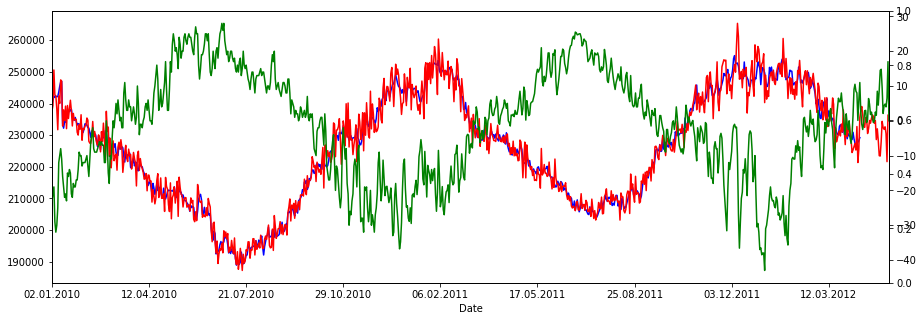

15


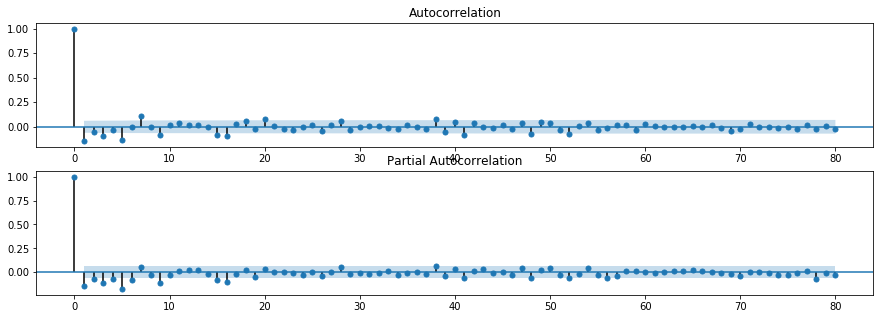

const       -9.450591
ar.L1.D.y    0.134115
ar.L2.D.y   -0.126439
ar.L3.D.y   -0.076734
ar.L4.D.y   -0.073658
ar.L5.D.y   -0.066966
ar.L6.D.y   -0.085980
ar.L7.D.y    0.018599
dtype: float64
(13560.903644816748, 13603.418136784139, 13577.20549413876)


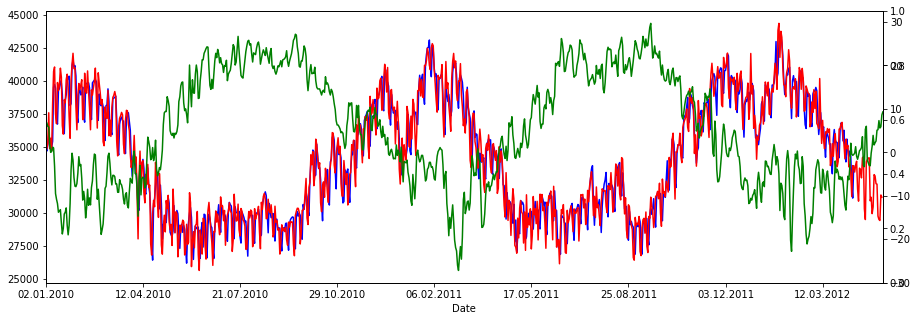

16


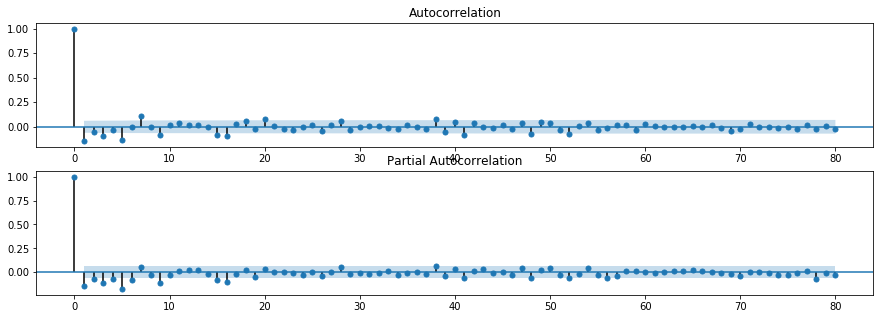

const       -35.511387
ar.L1.D.y     0.019511
ar.L2.D.y    -0.081689
ar.L3.D.y     0.013162
ar.L4.D.y    -0.034149
ar.L5.D.y    -0.018864
ar.L6.D.y    -0.014776
ar.L7.D.y     0.063126
dtype: float64
(15177.38436921697, 15219.888037370669, 15193.682998714012)


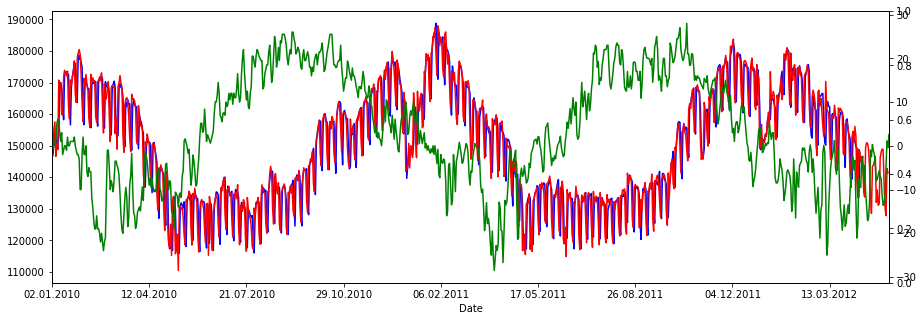

17


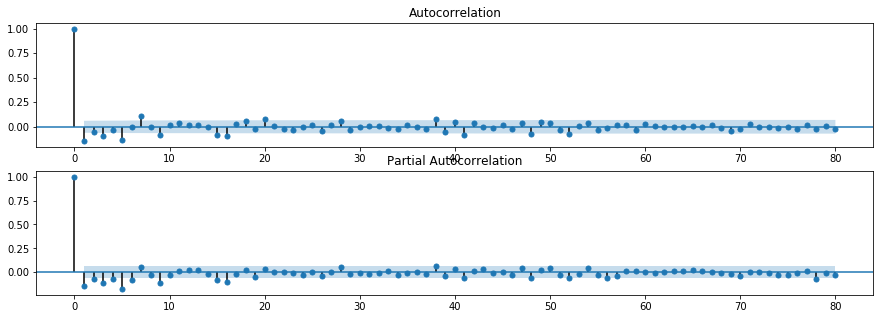

const       -2.140851
ar.L1.D.y   -0.024685
ar.L2.D.y   -0.130957
ar.L3.D.y   -0.107903
ar.L4.D.y   -0.065423
ar.L5.D.y   -0.005654
ar.L6.D.y   -0.044299
ar.L7.D.y    0.023168
dtype: float64
(12577.646122028522, 12620.160613995913, 12593.947971350533)


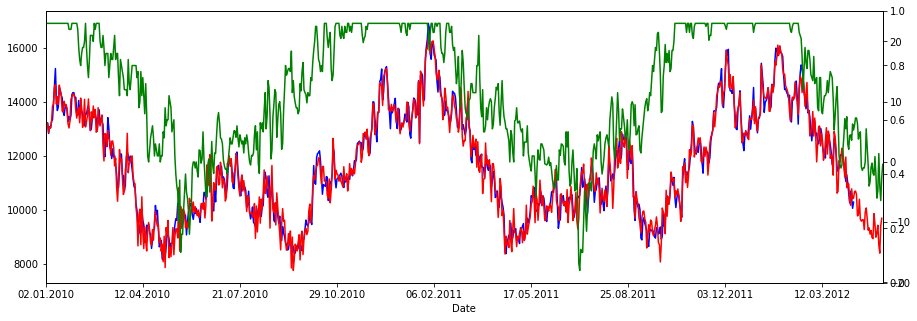

18


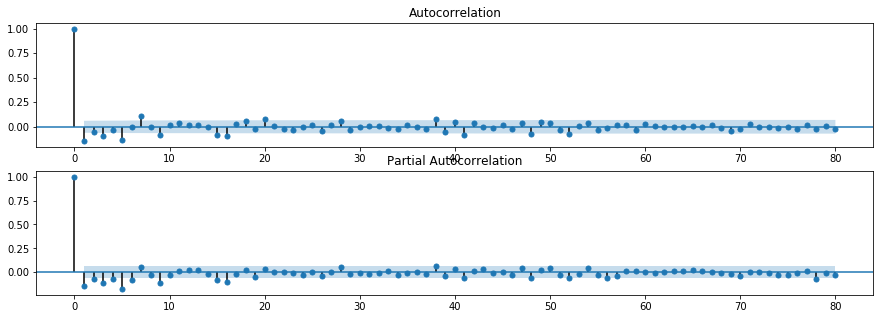

const       -3.676063
ar.L1.D.y   -0.238243
ar.L2.D.y   -0.163596
ar.L3.D.y   -0.098389
ar.L4.D.y   -0.043923
ar.L5.D.y   -0.083277
ar.L6.D.y   -0.088775
ar.L7.D.y   -0.023900
dtype: float64
(13555.801235075955, 13598.315727043346, 13572.103084397966)


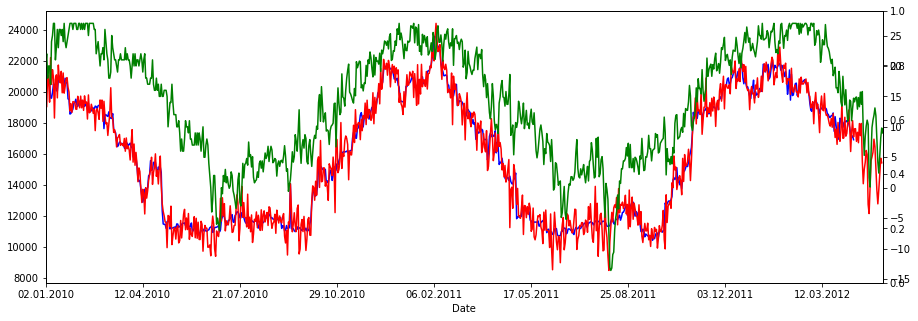

19


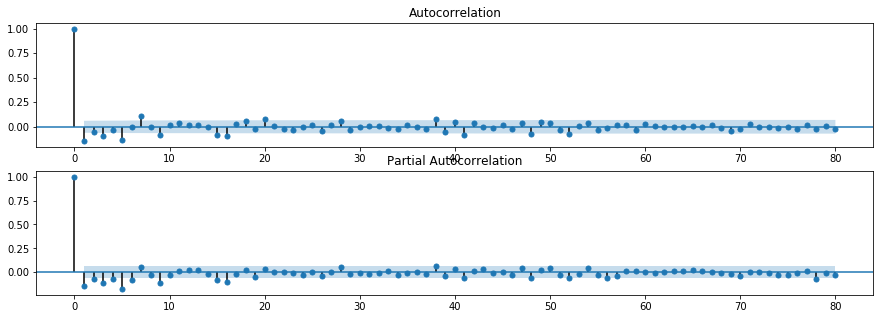

const       -31.403298
ar.L1.D.y     0.109205
ar.L2.D.y    -0.059196
ar.L3.D.y    -0.086212
ar.L4.D.y    -0.021028
ar.L5.D.y    -0.010277
ar.L6.D.y    -0.000748
ar.L7.D.y     0.024527
dtype: float64
(15531.491346461897, 15574.005838429288, 15547.793195783908)


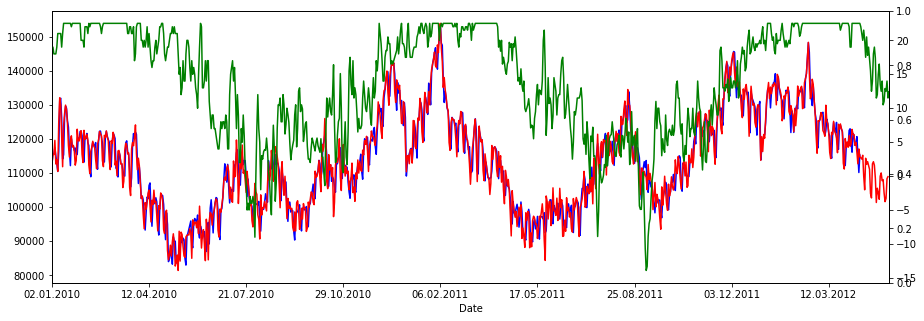

20


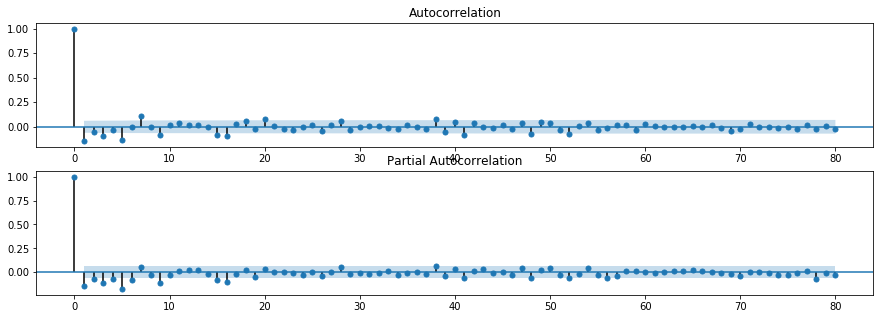

const       -12.278755
ar.L1.D.y     0.100705
ar.L2.D.y    -0.156583
ar.L3.D.y    -0.034408
ar.L4.D.y     0.053230
ar.L5.D.y     0.010150
ar.L6.D.y     0.044864
ar.L7.D.y     0.082603
dtype: float64
(13441.865410808854, 13484.379902776245, 13458.167260130866)


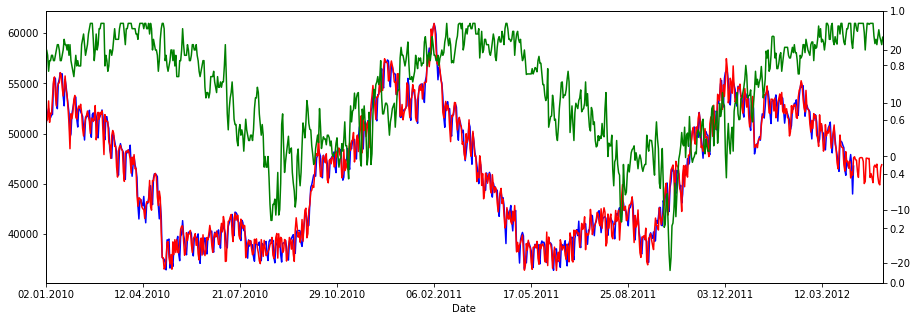

21


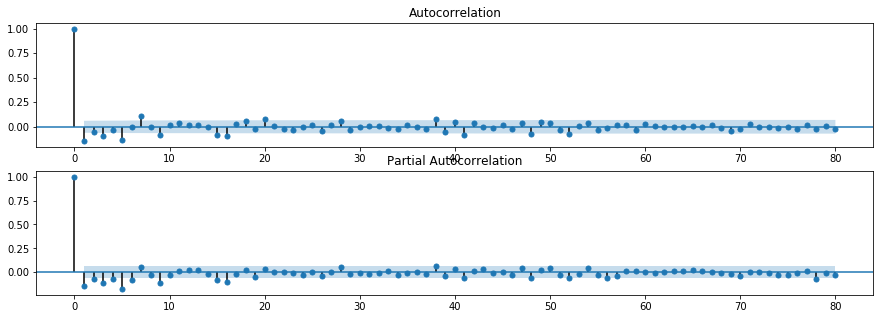

const       -14.792362
ar.L1.D.y    -0.008395
ar.L2.D.y     0.036446
ar.L3.D.y     0.089592
ar.L4.D.y    -0.071361
ar.L5.D.y     0.015790
ar.L6.D.y    -0.062908
ar.L7.D.y     0.061567
dtype: float64
(16516.34485934563, 16558.859351313022, 16532.646708667642)


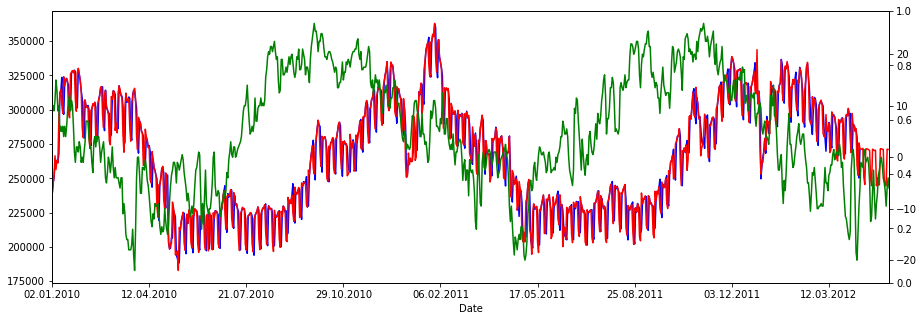

22


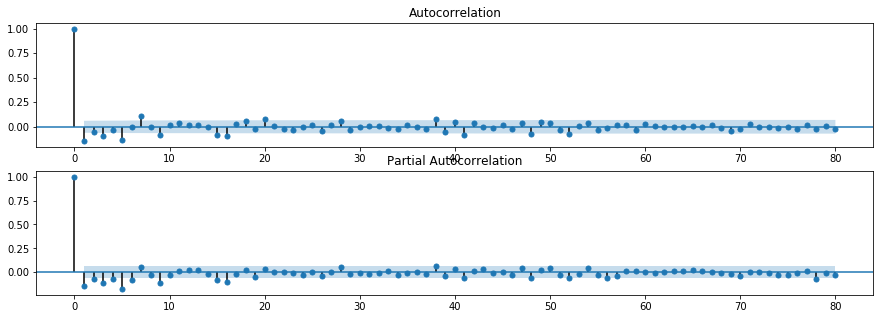

const        11.158644
ar.L1.D.y     0.160800
ar.L2.D.y    -0.110191
ar.L3.D.y    -0.004712
ar.L4.D.y    -0.092220
ar.L5.D.y    -0.024597
ar.L6.D.y    -0.070441
ar.L7.D.y     0.065019
dtype: float64
(16821.277324268864, 16863.791816236255, 16837.579173590875)


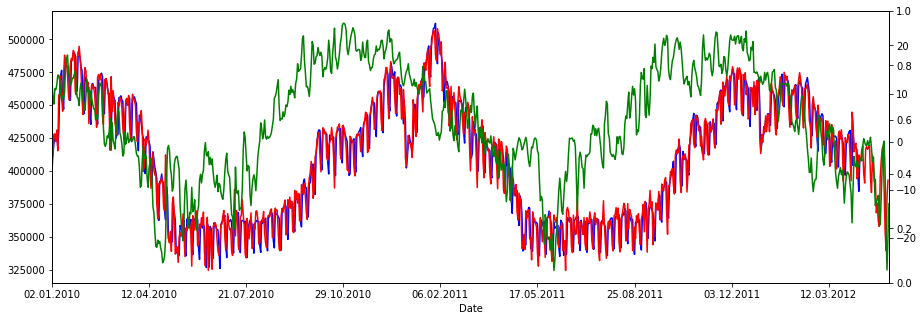

In [505]:
for i in np.arange(1, 23):
    print(i)
    pred(ts_train[i], ts_test[i], ts[i])

In [506]:
for i in ts_test[1:]:
    i.index = i['ID']

In [507]:
final_forecast = pd.DataFrame(pd.concat([i['ACTUAL'] for i in ts_test[1:]]))

In [508]:
final_forecast.to_csv('result.csv')